In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text
import matplotlib.pyplot as plt
from sklearn import tree
from itertools import combinations


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns

# Load data
data = sns.load_dataset('titanic')
data = data.drop(['alive', 'deck'], axis=1)

# Handle missing values
data['age'].fillna(data['age'].mean(), inplace=True)
data['fare'].fillna(data['fare'].mean(), inplace=True)
data['embarked'].fillna(data['embarked'].mode()[0], inplace=True)

# Convert categorical features to numerical
data = pd.get_dummies(data)

X = data.drop('survived', axis=1)
y = data['survived']

# преобразуйте категориальные признаки в числовые
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build decision tree model
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


DecisionTreeClassifier(max_depth=3, random_state=42)

c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

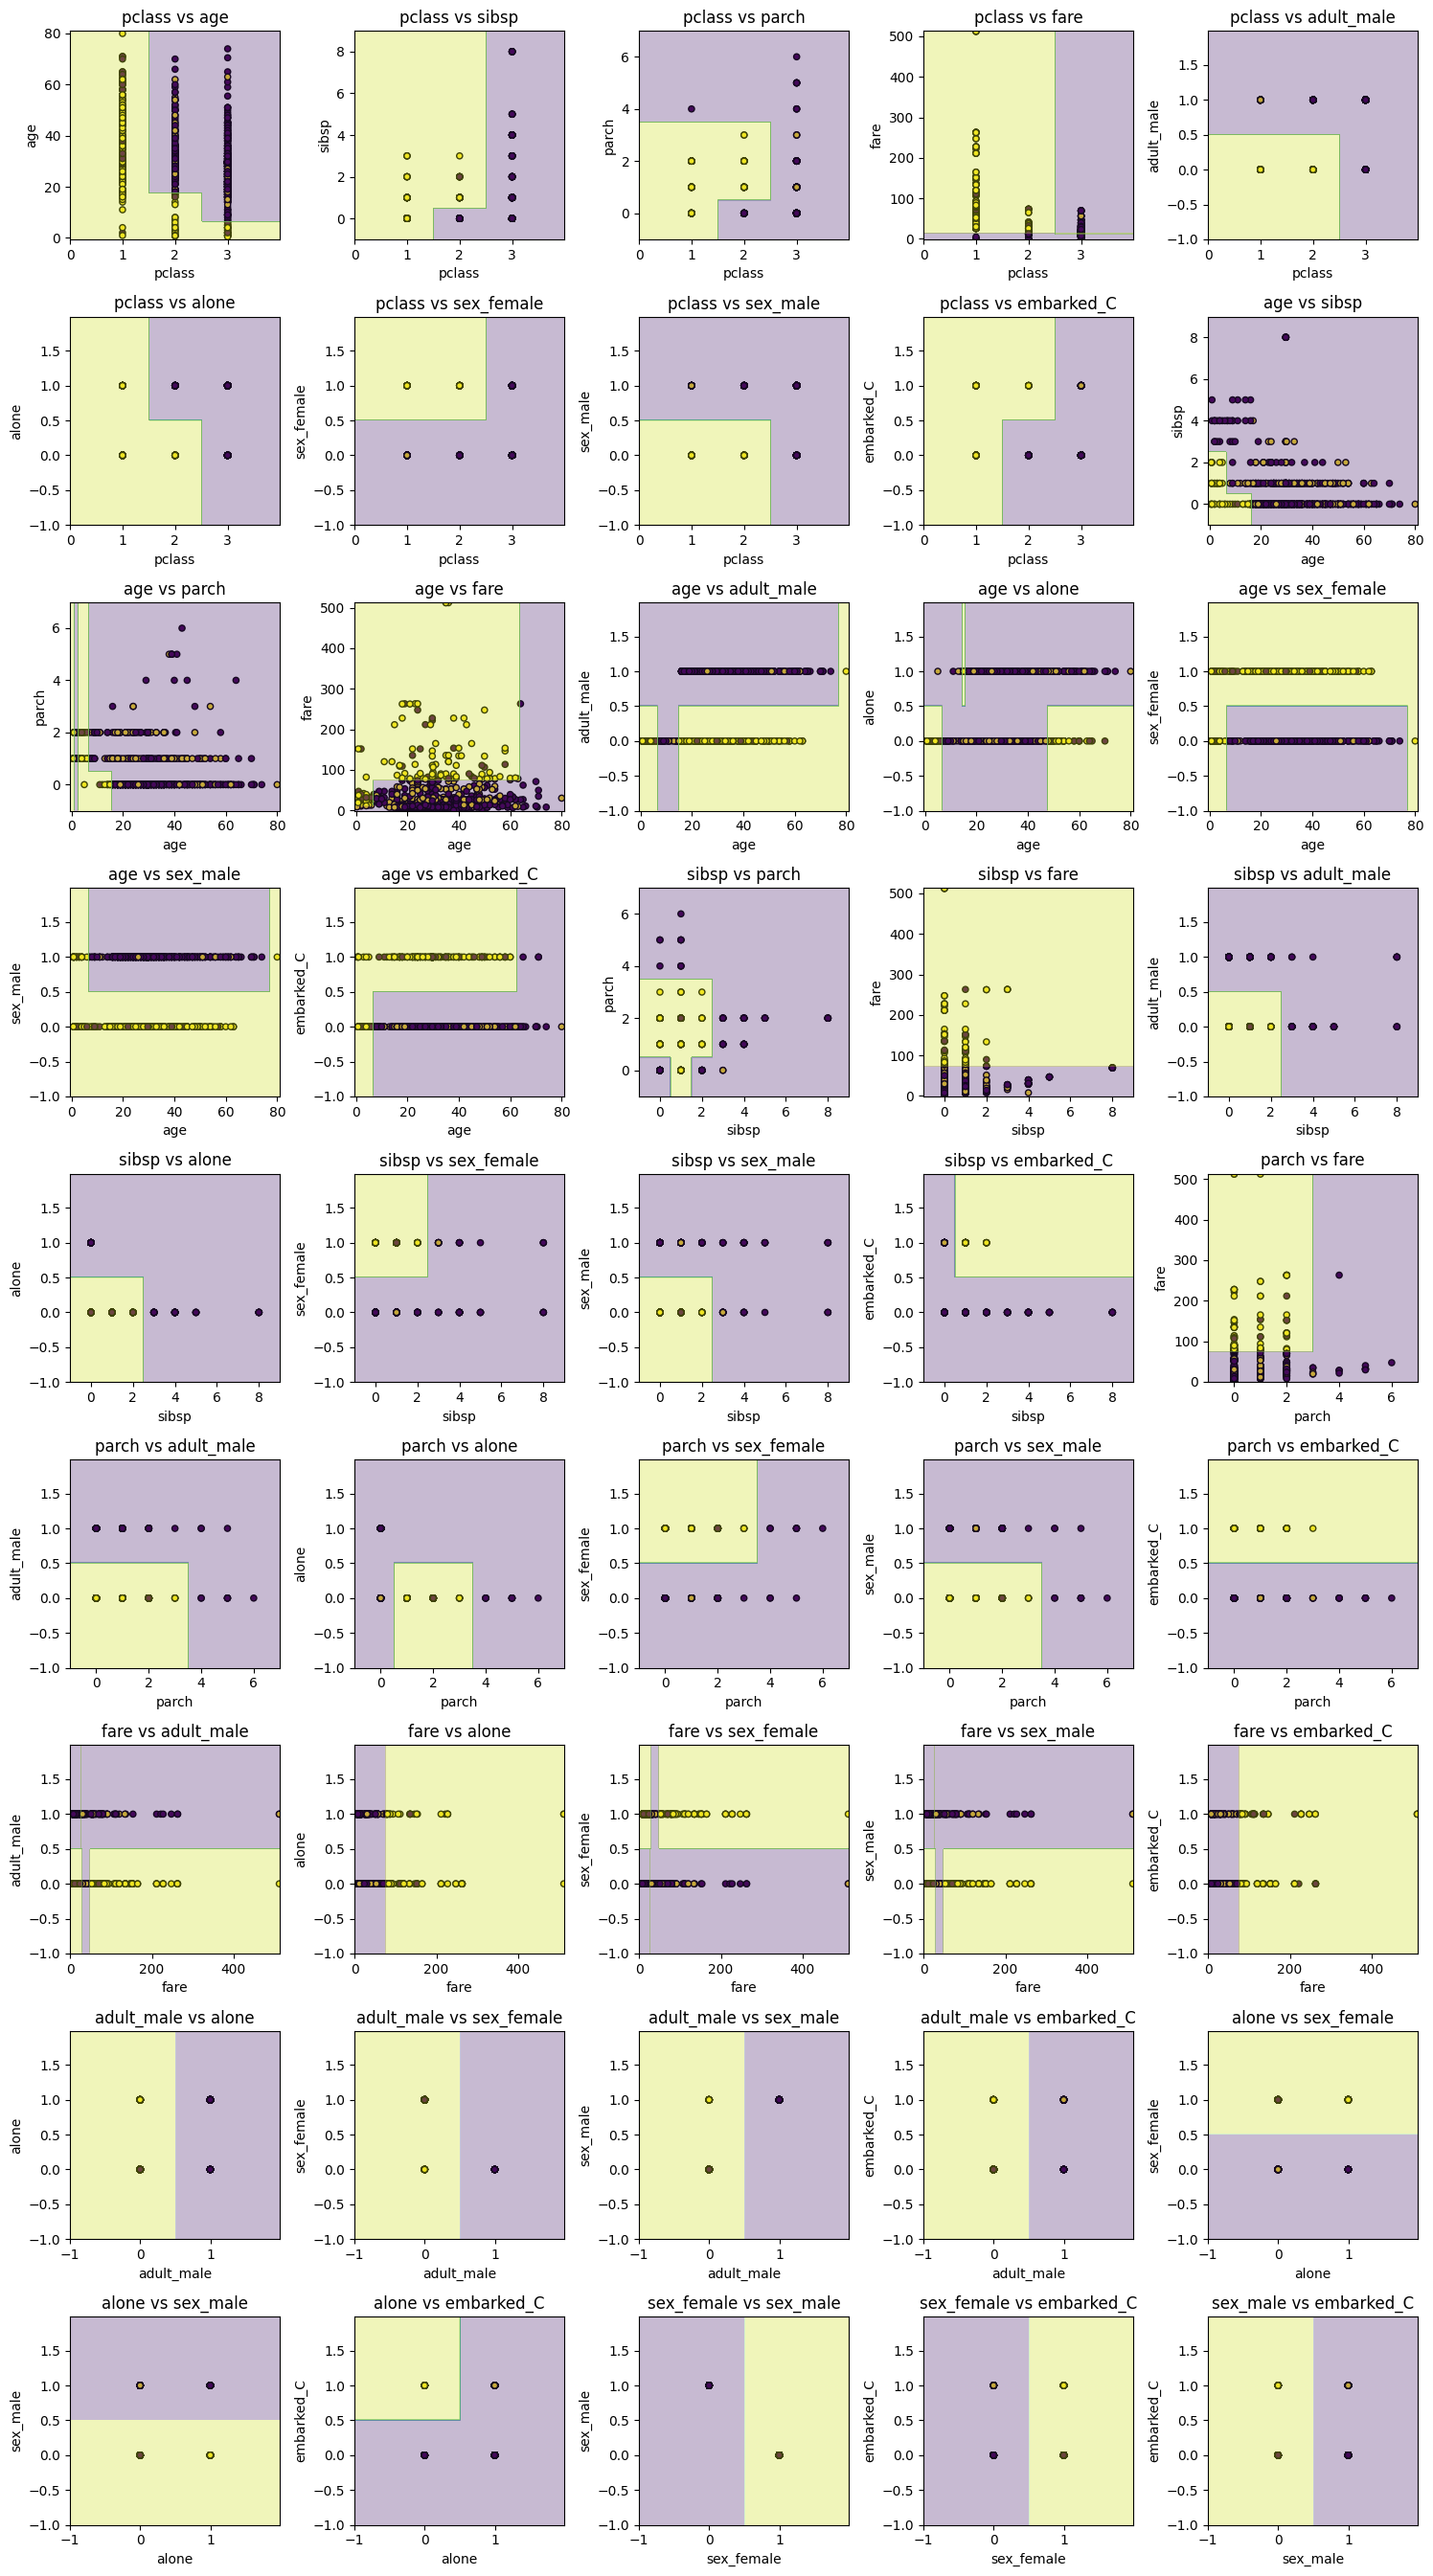

In [6]:
from itertools import combinations

# Choose the first n features
n_features_to_plot = 10  # Замените это числом признаков, которые вы хотите включить
selected_features = X.columns[:n_features_to_plot]

# Get all pairs of features
feature_pairs = list(combinations(selected_features, 2))

# Calculate the number of rows needed for the subplot grid
num_rows = (len(feature_pairs) + 4) // 5
num_cols = min(len(feature_pairs), 5)

# Create a subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3 * num_rows))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot decision boundaries for each pair of features
for i, pair in enumerate(feature_pairs):
    feature1, feature2 = pair
    
    # Select only the current pair of features
    X_pair = X[[feature1, feature2]]
    
    # Train the decision tree model on the selected features
    clf_pair = DecisionTreeClassifier(max_depth=3, random_state=42)
    clf_pair.fit(X_pair, y)
    
    # Plot decision boundary
    axes[i].scatter(X_pair[feature1], X_pair[feature2], c=y, cmap='viridis', edgecolor='k', s=20)
    
    axes[i].set_xlabel(feature1)
    axes[i].set_ylabel(feature2)
    axes[i].set_title(f'{feature1} vs {feature2}')
    
    x_min, x_max = X_pair[feature1].min() - 1, X_pair[feature1].max() + 1
    y_min, y_max = X_pair[feature2].min() - 1, X_pair[feature2].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = clf_pair.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    axes[i].contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns

# Load data
data = sns.load_dataset('titanic')
data = data.drop(['alive', 'deck'], axis=1)

# Handle missing values
data['age'].fillna(data['age'].mean(), inplace=True)
data['fare'].fillna(data['fare'].mean(), inplace=True)
data['embarked'].fillna(data['embarked'].mode()[0], inplace=True)

# Convert categorical features to numerical
data = pd.get_dummies(data)

X = data.drop('survived', axis=1)
y = data['survived']

X['age'].fillna(X['age'].mean(), inplace=True)
X['fare'].fillna(X['fare'].mean(), inplace=True)

# замените пропущенные значения (NaN) наиболее часто встречающимся значением для категориальных признаков
X['embarked'].fillna(X['embarked'].mode()[0], inplace=True)

# преобразуйте категориальные признаки в числовые
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build decision tree model
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Visualize decision boundaries for pairs of features
features_to_visualize = X_train.columns[:2]  # Choose the first 2 features for visualization

for i, feature1 in enumerate(features_to_visualize):
    for j, feature2 in enumerate(features_to_visualize):
        if i < j:
            plt.figure(figsize=(8, 6))

            x_min, x_max = X_train[feature1].min() - 1, X_train[feature1].max() + 1
            y_min, y_max = X_train[feature2].min() - 1, X_train[feature2].max() + 1
            xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

            # Ensure compatibility with decision tree prediction
            mesh_data = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=X_train.columns)
            Z = clf.predict(mesh_data)

            Z = Z.reshape(xx.shape)

            plt.contourf(xx, yy, Z, alpha=0.3)
            plt.scatter(X_train[feature1], X_train[feature2], c=y_train, edgecolors='k', marker='o', s=50, linewidth=1)

            plt.title(f"Decision Surface for {feature1} vs {feature2}")
            plt.xlabel(feature1)
            plt.ylabel(feature2)

            plt.show()
